In [1]:
from train_pipeline import train

import os
import torch
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf


def load_cfg(overrides=()):
    # with initialize_config_dir(config_dir="/app/notebooks/draft_02/conf"):
    with initialize(version_base=None, config_path="./conf"):
        cfg = compose(config_name='config', overrides=list(overrides))
        return cfg

from IPython.display import clear_output

import lovely_tensors as lt
lt.monkey_patch()

# cfg = load_cfg(overrides=[
#     "+exp=00_siren_init",
#     f"model.first_layer_init_c={1.9339}",
#     f"model.init_c={39.43}",
#     # "image=cameraman",
#     "+device=cuda:1",
# ])

cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    # f"model.first_layer_init_c={2.}",
    # f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

cfg.logging.experiment_name += '__baseline'
print(cfg.logging.experiment_name)

# train(cfg)

siren_init__initc=6__flic=1__nh=3__h=256__baseline


In [2]:
from spellbook.splitnet import plot_distributions, U

In [3]:
coords = U(2000, 2)

In [17]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    # f"model.first_layer_init_c={2.}",
    # f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

model = instantiate(cfg.model, out_features=3)

out = model.forward_with_activations(coords)
out_default_init = out
out.keys()

# plot_distributions(out)

# for key, value in out.items():
#     plot_distributions({key: value}, autosize=True)

odict_keys(['input', 'layer_0_preact', 'layer_0_act', 'layer_1_preact', 'layer_1_act', 'layer_2_preact', 'layer_2_act', 'layer_3_preact', 'layer_3_act', 'layer_4_act'])

In [18]:
cfg = load_cfg(overrides=[
    "+exp=00_siren_init",
    f"model.first_layer_init_c={2.}",
    f"model.init_c={40.}",
    "random_seed=[0,1]",
    'model.hidden_features=256',
    'model.hidden_layers=3',
    # "image=cameraman",
    "+device=cuda:1",
])

model = instantiate(cfg.model, out_features=3)

out = model.forward_with_activations(coords)
out_our_init = out

input
default_init (2000, 2) in [-1.000, 1.000] Œº=-0.007 œÉ=0.578
our_init (2000, 2) in [-1.000, 1.000] Œº=-0.007 œÉ=0.578


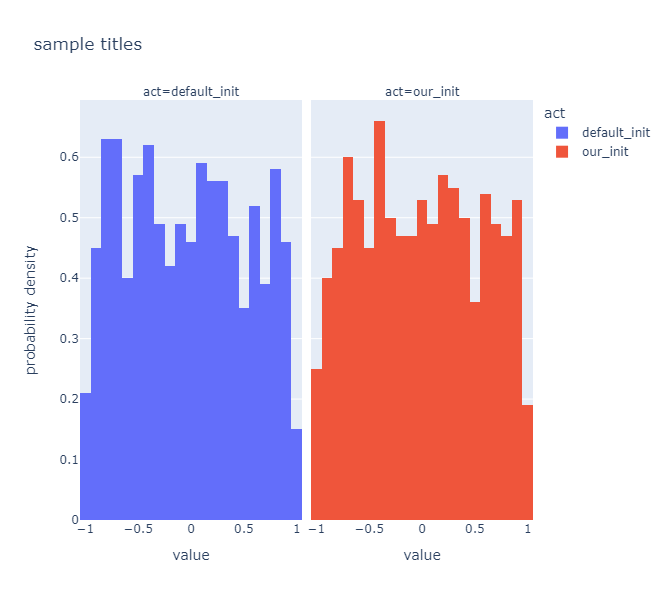

layer_0_preact
default_init (2000, 256) in [-43.425, 44.781] Œº=0.232 œÉ=13.039
our_init (2000, 256) in [-75.103, 67.936] Œº=-0.785 œÉ=19.149


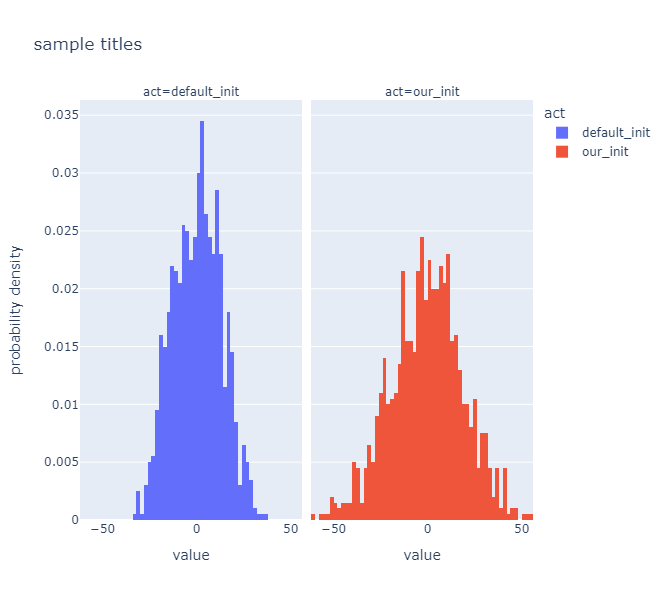

layer_0_act
default_init (2000, 256) in [-1.000, 1.000] Œº=0.008 œÉ=0.708
our_init (2000, 256) in [-1.000, 1.000] Œº=-0.001 œÉ=0.707


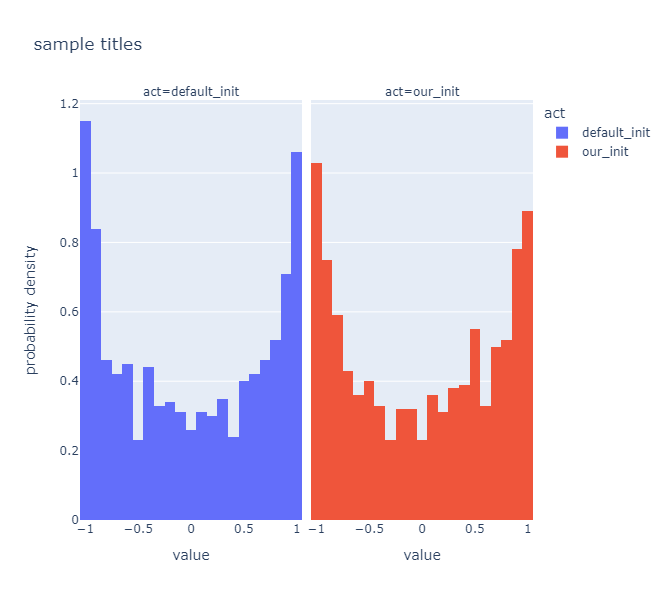

layer_1_preact
default_init (2000, 256) in [-5.539, 5.559] Œº=-0.018 œÉ=1.473
our_init (2000, 256) in [-12.176, 13.333] Œº=0.054 œÉ=2.793


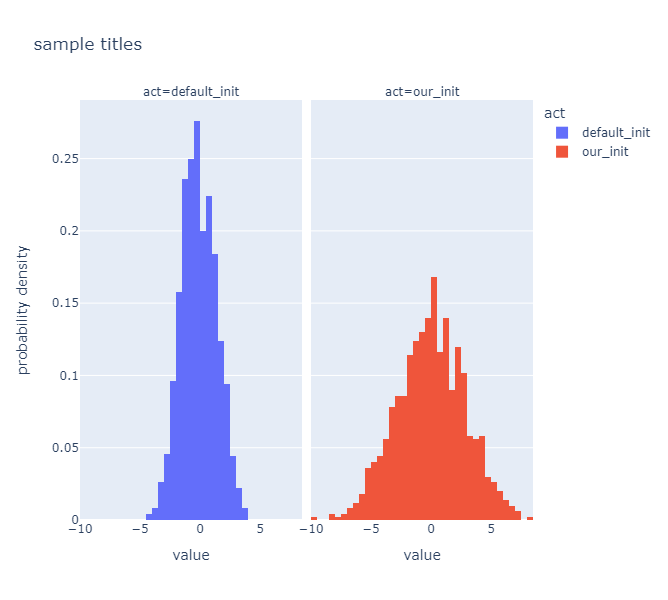

layer_1_act
default_init (2000, 256) in [-1.000, 1.000] Œº=0.001 œÉ=0.718
our_init (2000, 256) in [-1.000, 1.000] Œº=-0.000 œÉ=0.707


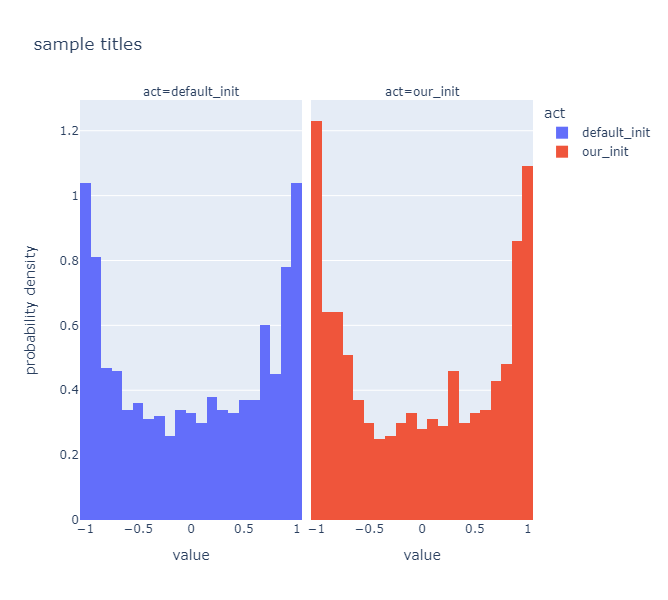

layer_2_preact
default_init (2000, 256) in [-6.275, 5.695] Œº=-0.078 œÉ=1.462
our_init (2000, 256) in [-12.370, 12.960] Œº=0.116 œÉ=2.782


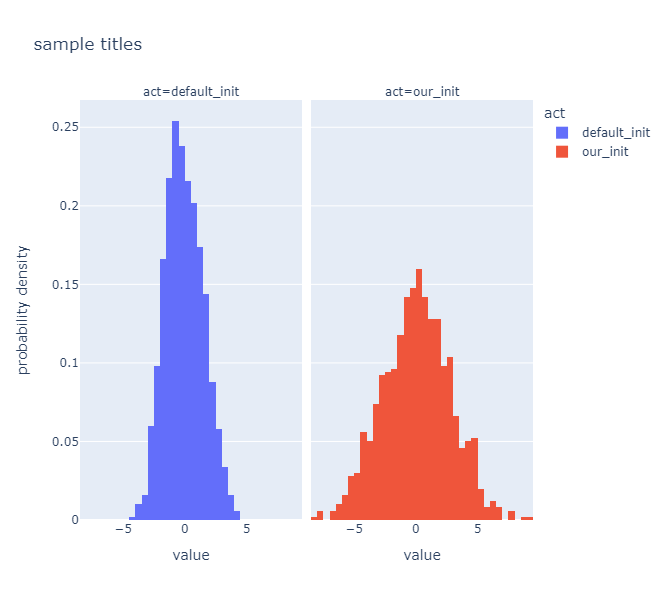

layer_2_act
default_init (2000, 256) in [-1.000, 1.000] Œº=-0.045 œÉ=0.707
our_init (2000, 256) in [-1.000, 1.000] Œº=0.003 œÉ=0.707


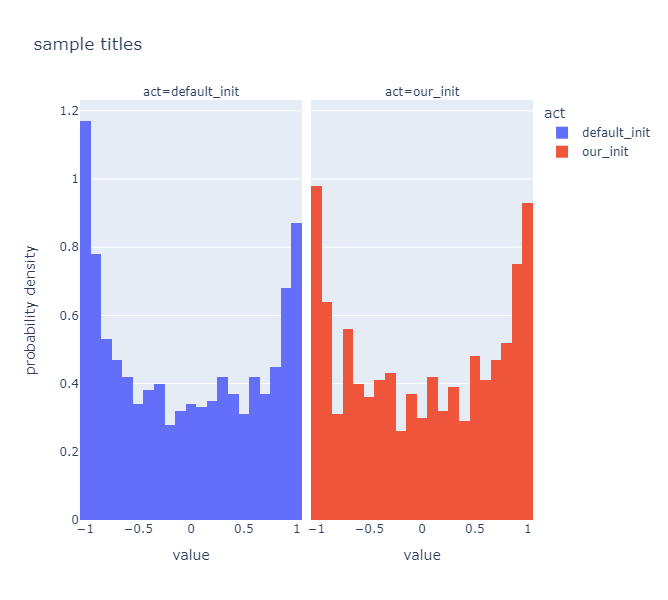

layer_3_preact
default_init (2000, 256) in [-5.490, 5.507] Œº=0.130 œÉ=1.468
our_init (2000, 256) in [-12.290, 13.206] Œº=-0.049 œÉ=2.798


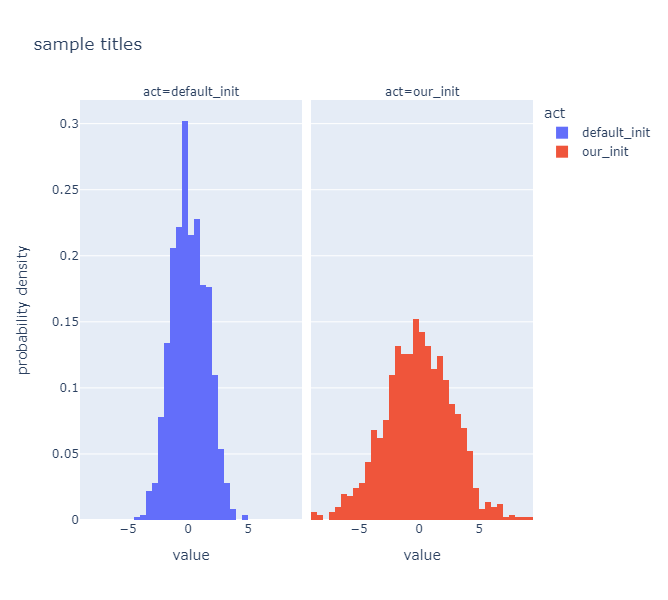

layer_3_act
default_init (2000, 256) in [-1.000, 1.000] Œº=0.025 œÉ=0.721
our_init (2000, 256) in [-1.000, 1.000] Œº=-0.001 œÉ=0.708


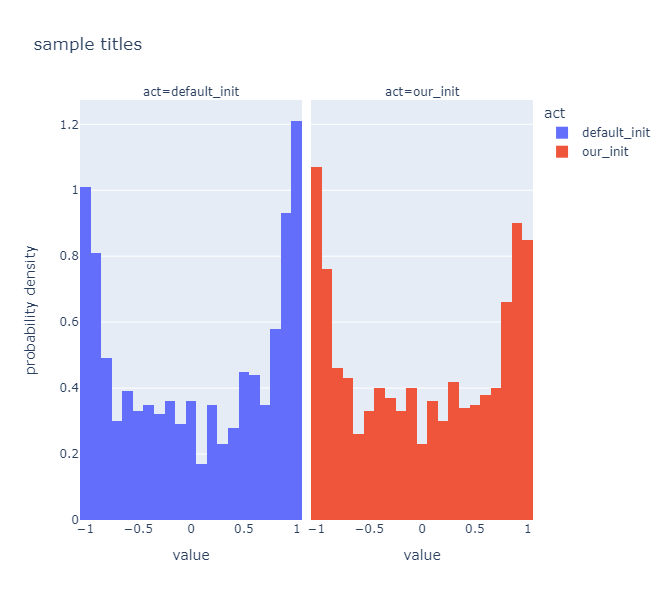

layer_4_act
default_init (2000, 3) in [-0.132, 0.159] Œº=0.004 œÉ=0.074
our_init (2000, 3) in [-0.326, 0.308] Œº=-0.012 œÉ=0.094


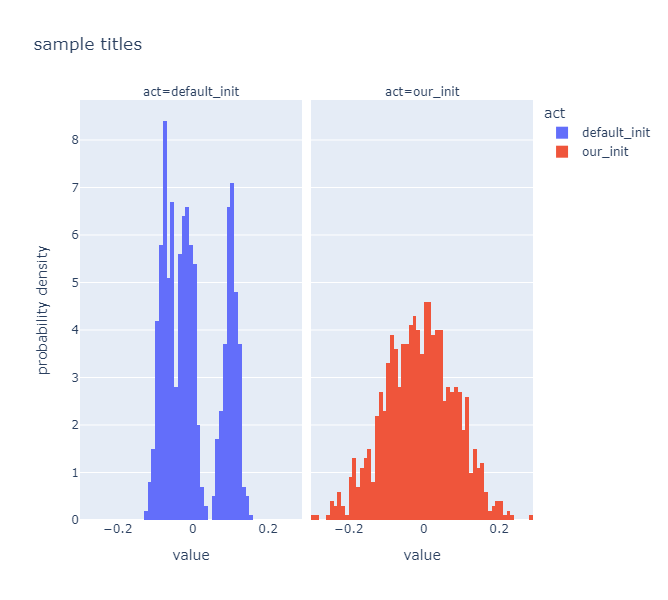

In [20]:

for key, value in out.items():
    print(key)
    
    plot_distributions({'default_init': out_default_init[key], 'our_init': out_our_init[key]})

$\mu \sigma$

In [16]:
for key in out_our_init.keys():
    o = out_default_init[key]
    md, sd = o.mean(), o.std()

    o = out_our_init[key]
    mo, so = o.mean(), o.std()

    print(key, f'(ùúá={md:.3f}, ùúé={sd:.3f}) vs (ùúá={mo:.3f}, ùúé={so:.3f})')

input (ùúá=-0.007, ùúé=0.578) vs (ùúá=-0.007, ùúé=0.578)
layer_0_preact (ùúá=1.134, ùúé=14.259) vs (ùúá=-0.688, ùúé=18.665)
layer_0_act (ùúá=-0.004, ùúé=0.707) vs (ùúá=-0.002, ùúé=0.707)
layer_1_preact (ùúá=0.054, ùúé=1.466) vs (ùúá=0.002, ùúé=2.816)
layer_1_act (ùúá=0.027, ùúé=0.714) vs (ùúá=0.001, ùúé=0.708)
layer_2_preact (ùúá=-0.080, ùúé=1.497) vs (ùúá=0.109, ùúé=2.817)
layer_2_act (ùúá=-0.055, ùúé=0.722) vs (ùúá=0.005, ùúé=0.707)
layer_3_preact (ùúá=-0.053, ùúé=1.523) vs (ùúá=-0.081, ùúé=2.784)
layer_3_act (ùúá=-0.026, ùúé=0.726) vs (ùúá=-0.002, ùúé=0.707)
layer_4_act (ùúá=-0.039, ùúé=0.030) vs (ùúá=-0.004, ùúé=0.091)
